# HOMEWORK 11

In this homework you are going to improve the DNN for house price estimation we built during the lesson. The objective is to beat the performance (i.e. to get a closer estimation) of the last network we built in the lecture.

The structure of this homework is as follows:
 * First, we are going to build the reference network (exactly the same network we implemented in the lecture).
 * You are going to run it a write down the price estimation error (Validation MAE).
 * Then you are going to make some modifications in order to make the network perform better.
 
In the section **Tasks** you will find what modification you'll need to implement as well as some hints.
 
At the end, as usual, there are some question waiting for you to answer :-)

In [30]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

from tensorflow.keras import Model, metrics
from tensorflow.keras.layers import Dense, Dropout, Input

# Set the seeds
from numpy.random import seed
import tensorflow
#from tensorflow.random import set_seed
seed_value=1234578790 
tensorflow.set_random_seed(seed_value)

### Data Preparation

Let's load the data and prepare the training sets.

In [31]:
dataset = pd.read_csv('C:/Users/vlazarenko/Desktop/!cv/lesson_11/train.csv')

features = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
data = dataset[features]

# Filling nan with the mean of the column:
data = data.fillna(data.mean())

# Extract input values and normalize
x = data[features[1:]]
scale = StandardScaler()
x = scale.fit_transform(x)

# Extract output values (prices) and normalize
y = data[features[0]].values
y = y/100000

# Split into 75% for train and 25% for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed_value)

Let's use the same plotting helper we used in the lecture.

In [32]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, np.array(h['mean_absolute_error'])*1e5, '.-',
                               epochs, np.array(h['val_mean_absolute_error'])*1e5, '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('MAE')
    plt.legend(['Train', 'Validation'])
        
    print('Train MAE     ', h['mean_absolute_error'][-1]*1e5)
    print('Validation MAE', h['val_mean_absolute_error'][-1]*1e5)

### Building the Network

In [33]:
inputs = Input(shape=x.shape[1])
outputs = Dense(5, activation='relu')(inputs)
outputs = Dense(1, activation='linear')(outputs)
model = Model(inputs, outputs)

model.compile(optimizer ='adam', loss ='mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


### Training the Network

Train MAE      23189.343512058258
Validation MAE 25408.869981765747


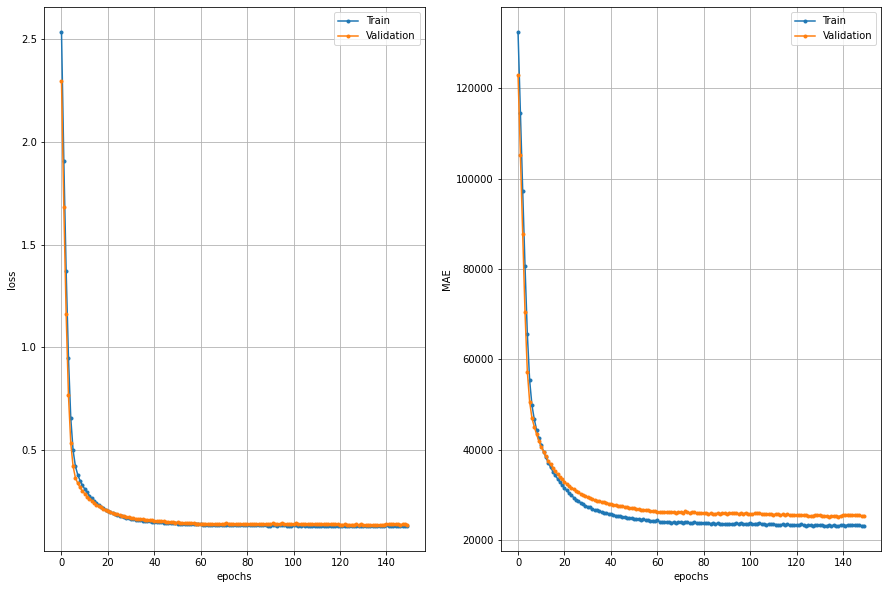

In [34]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=32, verbose=0)
plot_history(history)

### Tasks

Improve the network so you obtain a better estimation error than the reference. You can try the following:
* Add a new feature to your inputs. For instance, `LotArea` (lot size in square feet) seems like a good candidate :-)
* Try increasing the number of neurons in the first layer. Currently, we have 5 neurons there, what happens if we increase it to 10?

In [35]:
dataset = pd.read_csv('C:/Users/vlazarenko/Desktop/!cv/lesson_11/train.csv')

features = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea']
data = dataset[features]

# Filling nan with the mean of the column:
data = data.fillna(data.mean())

# Extract input values and normalize
x = data[features[1:]]
scale = StandardScaler()
x = scale.fit_transform(x)

# Extract output values (prices) and normalize
y = data[features[0]].values
y = y/100000

# Split into 75% for train and 25% for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed_value)

### Building the Network

In [36]:
inputs = Input(shape=x.shape[1])
outputs = Dense(5, activation='relu')(inputs)
outputs = Dense(1, activation='linear')(outputs)
model = Model(inputs, outputs)

model.compile(optimizer ='adam', loss ='mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 35        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### Training the Network

Train MAE      22851.254045963287
Validation MAE 23618.122935295105


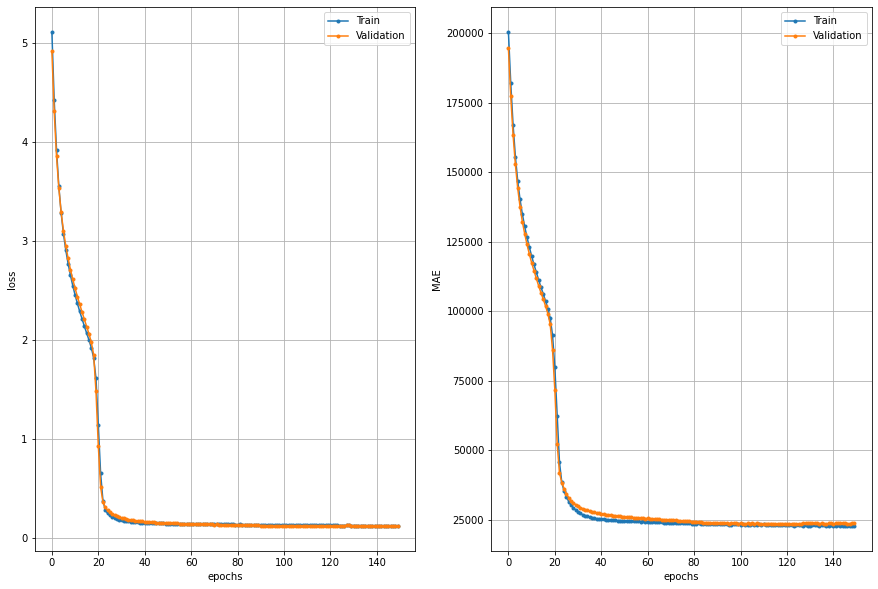

In [37]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=32, verbose=0)
plot_history(history)

### Questions
* What is the new price estimation error after your modifrications? Is it better than before?
* Does adding more features help?
### Adding LotArea as new features definitely helped getting better MAE 22851 compared to 23189
### Let's try to add more neurons and see if we can get better result


In [ ]:
dataset = pd.read_csv('C:/Users/vlazarenko/Desktop/!cv/lesson_11/train.csv')

features = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea']
data = dataset[features]

# Filling nan with the mean of the column:
data = data.fillna(data.mean())

# Extract input values and normalize
x = data[features[1:]]
scale = StandardScaler()
x = scale.fit_transform(x)

# Extract output values (prices) and normalize
y = data[features[0]].values
y = y/100000

# Split into 75% for train and 25% for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed_value)

In [38]:
inputs = Input(shape=x.shape[1])
outputs = Dense(10, activation='relu')(inputs)
outputs = Dense(1, activation='linear')(outputs)
model = Model(inputs, outputs)

model.compile(optimizer ='adam', loss ='mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 6)]               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


Train MAE      22040.295600891113
Validation MAE 24852.094054222107


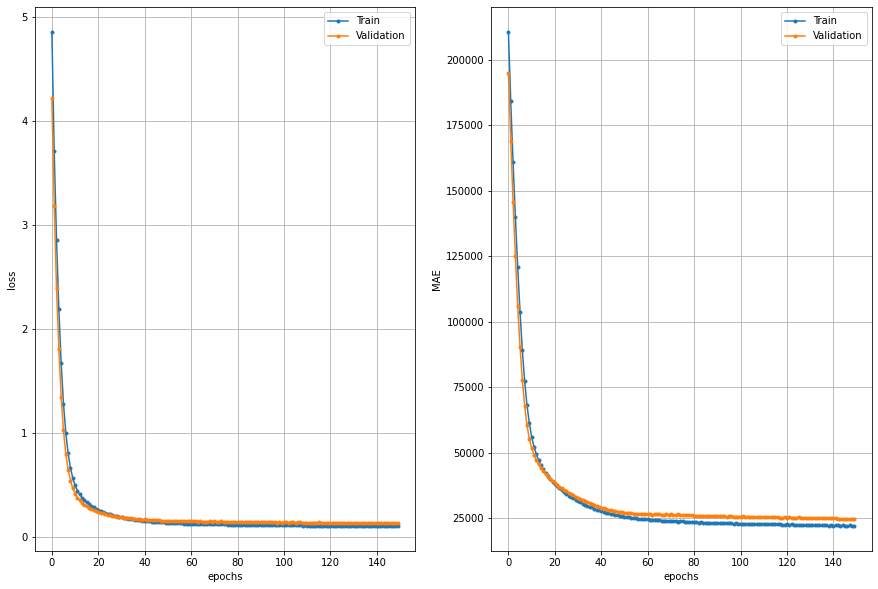

In [39]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=32, verbose=0)
plot_history(history)


* Does adding more neurons help?
### Adding more neurons helped getting better MAE = 22040
* What would you do to improv the network even further?
### Let's consider more features, 'OverallQual', 'OverallCond' look like good candidates

In [40]:
dataset = pd.read_csv('C:/Users/vlazarenko/Desktop/!cv/lesson_11/train.csv')

features = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea', 'OverallQual', 'OverallCond']
data = dataset[features]

# Filling nan with the mean of the column:
data = data.fillna(data.mean())

# Extract input values and normalize
x = data[features[1:]]
scale = StandardScaler()
x = scale.fit_transform(x)

# Extract output values (prices) and normalize
y = data[features[0]].values
y = y/100000

# Split into 75% for train and 25% for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed_value)

c:\Users\vlazarenko\.conda\envs\vvv2\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
c:\Users\vlazarenko\.conda\envs\vvv2\lib\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [41]:
inputs = Input(shape=x.shape[1])
outputs = Dense(10, activation='relu')(inputs)
outputs = Dense(1, activation='linear')(outputs)
model = Model(inputs, outputs)

model.compile(optimizer ='adam', loss ='mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


Train MAE      19665.47667980194
Validation MAE 22511.7489695549


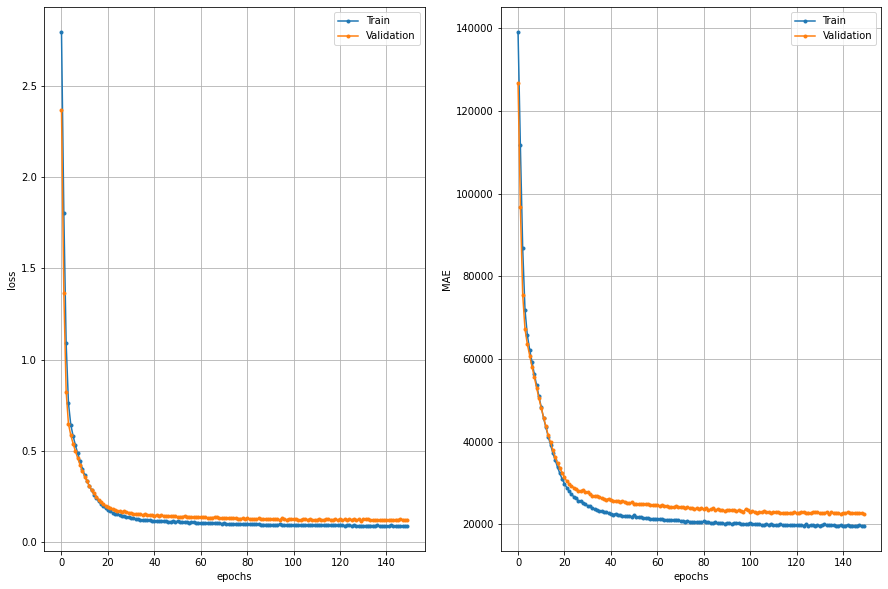

In [42]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=32, verbose=0)
plot_history(history)

##### Wow! Impressive result! We managed to reach MAE = 19665
##### Let's continue in the file Homework11_continue.ipynb
##### We are going to use non-numberic features for our process.  https://www.quora.com/How-the-text-data-is-converted-to-numeric-value-to-train-a-Neural-Network-in-NLP